Ridge Regression MSE: 8.142424907386358
Lasso Regression MSE: 8.022971808884888


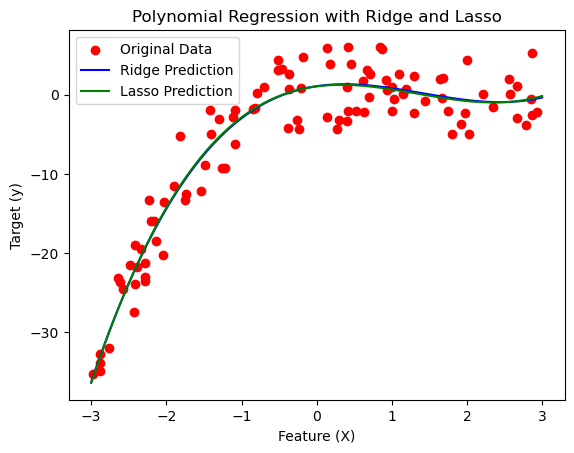

In [1]:
# Step 2: Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 3: Creating a simple dataset (X, y)
# Here X is the feature (input), and y is the target (output)
np.random.seed(0)
X = np.random.rand(100, 1) * 6 - 3  # Random points between [-3, 3]
y = 0.5 * X**3 - 2 * X**2 + 1.5 * X + np.random.randn(100, 1) * 3  # Cubic relationship with noise

# Step 4: Preprocessing the data
# We use PolynomialFeatures to create polynomial terms (here degree 3)
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 6: Train the Ridge and Lasso models
ridge_reg = Ridge(alpha=1.0)  # L2 regularization (Ridge)
lasso_reg = Lasso(alpha=0.1)  # L1 regularization (Lasso)

ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Step 7: Make predictions on the test set
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# Step 8: Evaluate the models using Mean Squared Error
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")

# Step 9: Visualizing the results
X_range = np.linspace(-3, 3, 100).reshape(100, 1)
X_range_poly = poly_features.transform(X_range)

# Ridge Prediction
ridge_range_pred = ridge_reg.predict(X_range_poly)
# Lasso Prediction
lasso_range_pred = lasso_reg.predict(X_range_poly)

# Plotting the original data, Ridge, and Lasso models
plt.scatter(X, y, color='red', label='Original Data')
plt.plot(X_range, ridge_range_pred, color='blue', label='Ridge Prediction')
plt.plot(X_range, lasso_range_pred, color='green', label='Lasso Prediction')
plt.title('Polynomial Regression with Ridge and Lasso')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()
